## 비지도 학습

### 비지도 학습
- 결과값이 없이 입력값만 주고 학습을 시켜서 유사성을 파악하게 하는 방식 (정답 없음)
- 데이터의 숨겨진 특징이나 구조를 발견하는 데 사용
- 정답이 없는 입력 데이터만 이용하기 때문에 
- 입력값 자체의 특성과 분포만을 파악해서 그룹핑하는 군집화에 주로 사용
 

### 군집화
- 데이터 포인트들을 별개의 군집으로 그룹화하는 것
- 유사성이 높은 데이터들을 동일한 그룹으로 분류하고
- 서로 다른 군집들이 상이성을 가지도록 그룹화
- 주어진 자료에 대한 요약 정리 혹은 이해를 목적으로 실시  

### 대표적 군집화 알고리즘
- K-평균
- DBSCAN


### K-평균 (K-Means) 알고리즘
- 군집화에서 가장 일반적으로 사용되는 알고리즘
- 군집 중심점(centroid)이라는 특정한 임의 지점을 선택해서
- 해당 중심에 가까운 포인트들을 선택하는 군집화 기법

### DBSCAN (Density Based Spatial Clustering of Application with Noise)
- 밀도 기반 군집화 알고리즘
- 간단하고 직관적인 알고리즘으로 되어 있음에도
- 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서
- 데이터 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화 가능한 알고리즘

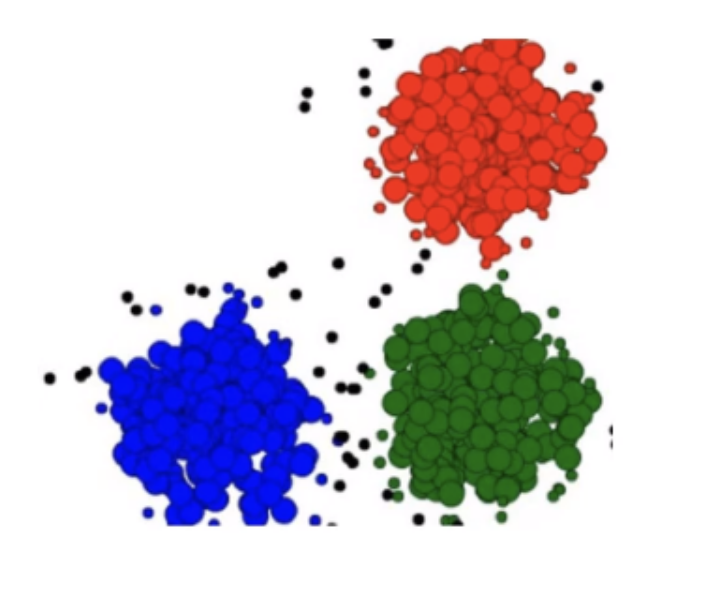

In [1]:
############################################################################

### K-평균 알고리즘

K-평균 (K-Means)
- 군집화에서 가장 일반적으로 사용되는 알고리즘
- 군집 중심점(centroid)이라는 특정한 임의 지점을 선택해서
- 해당 중심에 가까운 포인트들을 선택하는 군집화 기법

K-평균 동작 원리
- 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고
- 이동된 중심점에서 다시 가까운 포인트를 선택,
- 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행
- 모든 데이터 포인트에서 더 이상 중심점의 이동이 없을 경우에 반복을 멈추고
- 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법

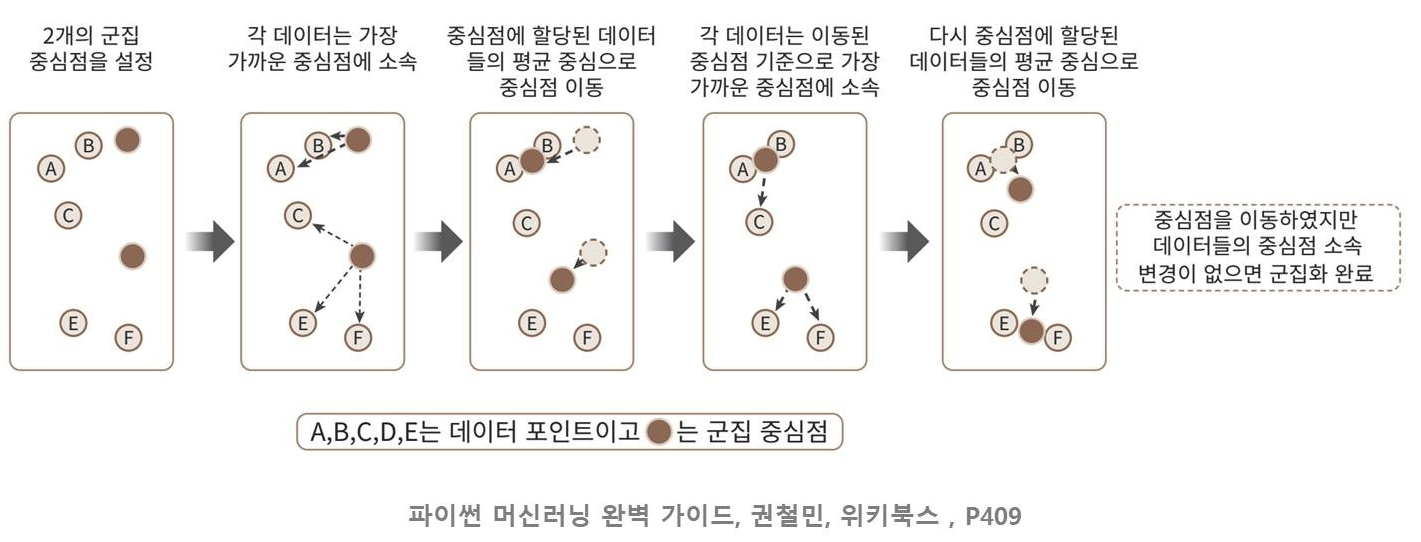

### K-평균의 장점과 단점

장점
- 알고리즘이 쉽고 간결
- 대용량 데이터에도 활용 가능
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘

단점
- 속성의 개수가 많을 경우 군집화 정확도가 떨어짐
- (PCA로 차원 축소 적용 필요할 수도 있음)
- 반복 횟수가 많을 경우 수행 시간 느려짐
- 이상치 데이터에 취약
- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기 어려움

### 사이킷런의 KMeans 클래스 사용

#### 주요 파라미터
- n_clusters : 군집 개수. 즉, 군집 중심점의 개수
- init : 초기화 방법. 초기에 군집 중심점의 좌표를 설정하는 방식
    - random : 무작위 
    - k-means++ : K-평균++ 방법
        - 일반적으로 k-means++ 방식으로 최초 설정
- n_init: 초기 중심위치 시도 횟수 
    - 디폴트 : 10   
        - 10개의 무작위 중심위치 목록 중 가장 좋은 값 선택  
  
#### k-means++
- 전통적인 K-Means의 문제를 해결하기 위해 새로 생긴 방식
- K-Means : 시작 시 중심점을 무작위로 선정 
    - 데이터 포인트 중에서 무작위로 1개를 선택해서 첫 번째 중심점으로 지정  
    - 나머지 데이터들은 첫 번째 중심점까지의 거리를 계산  
    - 두 번째 중심점은 각 점들로부터 거리에 비례한 확률에 따라 선택  


#### K-Means 메서드
- fit() : 클러스터링 알고리즘 수행 
    - labels_ 속성 : 클러스터링 결과  
- predict()    
    - fit_predict()   
- transform() : 데이터 포인트에서 각 클러스트 중심까지의 거리 반환      
    - fit_transform()  

#### 군집화 관련 주요 속성
- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표. 각 군집의 mean 값   
-

### K-Means을 이용한 붓꽃 데이터 셋 군집화 (Clustering)

붓꽃 데이터를 이용해서 K-평균 군집화 수행
- 꽃받침, 꽃잎의 길이, 너비에 따라 각 데이터의 군집화가 어떻게 결정되는 확인하고
- 이를 분류값과 비교

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# 데이터 프레임으로 변환
iris_df = pd.DataFrame(data=iris.data, columns=['sepal length', 
                                               'sepal width',
                                               'petal length',
                                               'petal width'])
iris_df.head(3)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


### KMeans 객체 생성하고 군집화 수행

In [8]:
# 붓꽃 데이터 세트를 3개의 그룹으로 군집화
# KMeans(그룹수, 초기 중심점 설정 방식, 최대 반복 횟수, 랜덤 스테이트)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_df)

# n_clusters : 군집 개수(군집 중심점의 개수)
# init : 초기화 방법 : 일반적으로 k-means++ 방식으로 설정 

KMeans(n_clusters=3, n_init=10, random_state=0)

In [9]:
# labels_ 속성을 통해 각 데이터 포인트별로 할당된 군집 중심점(Centroid) 확인
kmeans.labels_
# 클러스터링 결과(fit():군집화) : labels_속성에 저장됨
# 0, 1, 2 군집

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [12]:
kmeans.predict(iris_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [14]:
# 실제 붓꽃 품종 분류값과 얼마나 차이가 나는지 확인
# target, cluster 컬럼 추가
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_
iris_df.head()
iris_df.tail()

,sepal length,sepal width,petal length,petal width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


,sepal length,sepal width,petal length,petal width,target,cluster
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2
149,5.9,3.0,5.1,1.8,2,0


In [19]:
# target과 cluster값 개수 비교
iris_df.groupby(['target','cluster'])['sepal width'].count()

# 0그룹 : 48 + 12 = 64
# 1그룹 : 50
# 2그룹 : 2 + 36 = 38

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal width, dtype: int64

In [21]:
iris_df.groupby(['cluster']).count()

,sepal length,sepal width,petal length,petal width,target
cluster,,,,,
0,62,62,62,62,62
1,50,50,50,50,50
2,38,38,38,38,38


In [23]:
# cluster_centers_ 속성 : 각 군집의 중심점 좌표 (각 군집의 mean값)
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### 붓꽃 데이터 셋의 군집화를 시각화
- 2차원 평면상에 개별 데이터의 군집화를 시각적으로 표현
- 붓꽃 데이터 셋의 속성이 4개이므로, 2차원 평면에 적합지 않기 때문에
- PCA를 이용해서 4개의 속성을 2개로 차원 축소한 뒤에 
- X좌표, Y좌표로 개별 데이터 표현

### 차원 축소(Dimension Reduction)  
- 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해서  
    - 새로운 차원의 데이터 세트를 생성하는 것  
- 일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고
    - 희소한(sparse) 구조를 가지게 됨  
- 수백 개 이상의 피처로 구성된 데이터 세트의 경우
    - 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐
    - 또한 피처가 많을 경우 개별 피처 간의 상관관계가 높을 가능성이 큼
- 선형 회귀의 경우 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우
    - 이로 인한 다중 공선성 문제로 모델의 예측 성능 저하

### 차원 축소 목적 
- 학습 속도 향상, 모델링 연산의 효율성 기대
- 모델 성능 향상은 아님
- 피처 수가 줄어들면서 데이터 손실 발생으로 인해
    - 모델의 성능(정확도)은 떨어질 수 있음    

### PCA (Principal Component Analysis)
- 가장 대표적인 차원 축소 기법
- 여러 변수 간에 존재하는 상관관계를 이용해
- 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- 기존 데이터의 정보 유실이 최소화되도록 함
- 그러기 위해서는 가장 높은 분산을 가지는 데이터의 축을 찾아
- 이 축으로, 차원을 축소하는데, 이것이 PCA의 주성분이 됨
- 즉, 분산이 데이터의 특징을 가장 잘 나타내는 것으로 간주
--- 
- 주성분 분석 
  - 입력 데이터의 변동성이 가장 큰 축을 구하고
  - 다시 이 축에 직각적인 축을 반복적으로 축소하려는 차원 개수만큼 구한 뒤
  - 입력 데이터를 이 축들에 투영해 차원을 축소하는 방식


In [31]:
# 사이킷런의 PCA클래스를 사용해서 차원 축소

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed[:3]
# [x좌표, y좌표]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943]])

In [28]:
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [41]:
# iris_df에 pca_x, pca_y 컬럼으로 추가
iris_df['pca_x'] = pca_transformed[:,0] # 첫번째 값(x좌표) [행슬라이스 모든 행, 0번째열]
iris_df['pca_y'] = pca_transformed[:,1] # 두번째 값(y좌표)

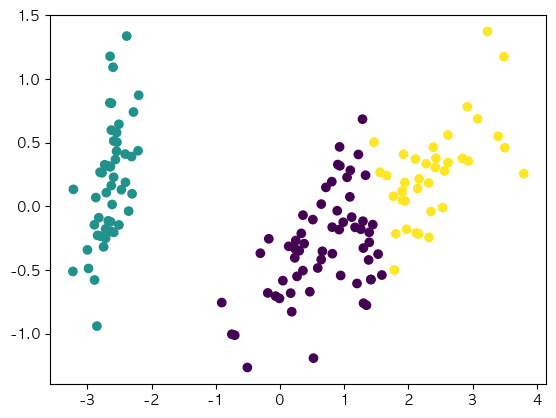

In [46]:
# 군집화된 데이터 시각화 : 군집별로 색상 다르게 표현
plt.scatter(x=iris_df['pca_x'], y=iris_df['pca_y'], c=iris_df['cluster'])

Text(0.5, 0, 'PCA 1')

Text(0, 0.5, 'PCA 2')

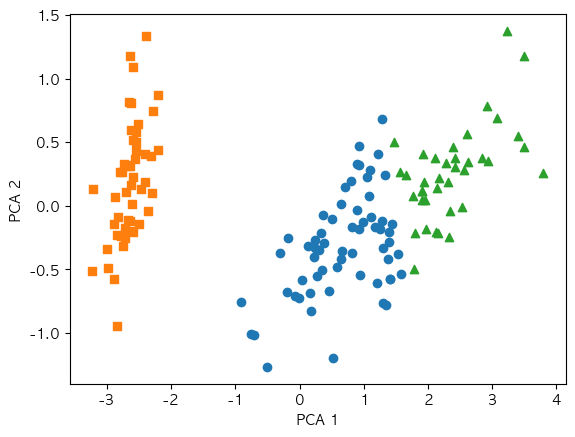

In [49]:
# 군집마다 모양 다르게 표현

# cluster값 이 0, 1, 2인 경우 별도의 index 추출
mk_0_idx = iris_df[iris_df['cluster'] == 0].index
mk_1_idx = iris_df[iris_df['cluster'] == 1].index
mk_2_idx = iris_df[iris_df['cluster'] == 2].index

plt.scatter(x=iris_df.loc[mk_0_idx, 'pca_x'], y=iris_df.loc[mk_0_idx, 'pca_y'], marker='o' ) #원
plt.scatter(x=iris_df.loc[mk_1_idx, 'pca_x'], y=iris_df.loc[mk_1_idx, 'pca_y'], marker='s' ) #네모
plt.scatter(x=iris_df.loc[mk_2_idx, 'pca_x'], y=iris_df.loc[mk_2_idx, 'pca_y'], marker='^' ) #세모

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [52]:
cluster_df = iris_df[['pca_x', 'pca_y']]
cluster_df

,pca_x,pca_y
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


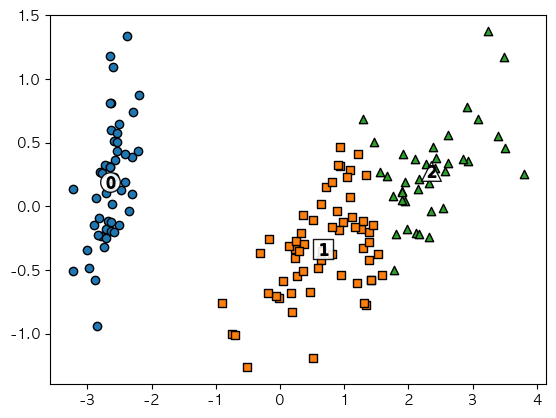

In [57]:
# 전체 과정 시각화 : 클러스터링 + 시각화 + 중심점 표시
# n_clusters=3 인 경우

# 전체 과정 시각화 : 클러스터링 + 시각화 + 중심점 표시 
# n_clusters=3인 경우 

import numpy as np

# KMeans 객체를 이용해서 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, n_init=10, init='k-means++', max_iter=300, random_state=0)
cluster_labels = kmeans.fit_predict(cluster_df)
# clusterDF['kmeans_label'] = cluster_labels
cluster_df.loc[:, 'kmeans_label'] = cluster_labels
# 컬럼 : pca_x	pca_y	kmeans_label

# cluster_centers_ 속성 : 개별 군집의 중심 위치 좌표
# 개별 클러스터 중심의 위치 좌표 시각화를 위해추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^']


# 군집된 label 유형별로 반복하면서 marker별로 scatter plot 수행
for label in unique_labels:
    # 군집별 마커로 산점도 표현
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]    
    plt.scatter(x=label_cluster['pca_x'], y=label_cluster['pca_y'], 
                edgecolor='k', marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    # 중심 좌표에 마커별 표시
    center_x_y = centers[label]
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, 
                edgecolor='k', marker=markers[label])
    
    # 마커 내에 레이블 값 표시
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', 
                edgecolor='k', marker='$%d$' % label) # k : black, w : white
    
plt.show()

# $ : matplotlib 수학적 표기 의미
# %d : 숫자값 출력 의미
# % label : 출력되는 레이블 값 (레이블 값을 %d 위치에 출력)

### 그래프 결과 
- 왼족에 모여있는 0번 군집은 속성위치가 명확히 분리되어 있음  
- 오른쪽에 모여 있는 1번과 2번 군집은 속성의 위치가 명확히 분리하기 어려운 부분이 존재 
- 군집과 군집 간의 거리가 짧으면 군집 성능이 좋은 건 아님   

### 군집수 변경하면서 결과 확인

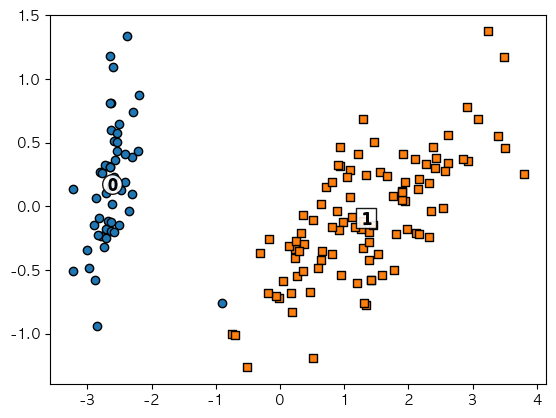

In [59]:
# 전체 과정 시각화 : 클러스터링 + 시각화 + 중심점 표시 
# n_clusters=2인 경우 

import numpy as np

# KMeans 객체를 이용해서 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=2, n_init=10, init='k-means++', max_iter=300, random_state=0)
cluster_labels = kmeans.fit_predict(cluster_df)
# clusterDF['kmeans_label'] = cluster_labels
cluster_df.loc[:, 'kmeans_label'] = cluster_labels
# 컬럼 : pca_x	pca_y	kmeans_label

# cluster_centers_ 속성 : 개별 군집의 중심 위치 좌표
# 개별 클러스터 중심의 위치 좌표 시각화를 위해추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^']


# 군집된 label 유형별로 반복하면서 marker별로 scatter plot 수행
for label in unique_labels:
    # 군집별 마커로 산점도 표현
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]    
    plt.scatter(x=label_cluster['pca_x'], y=label_cluster['pca_y'], 
                edgecolor='k', marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    # 중심 좌표에 마커별 표시
    center_x_y = centers[label]
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, 
                edgecolor='k', marker=markers[label])
    
    # 마커 내에 레이블 값 표시
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', 
                edgecolor='k', marker='$%d$' % label) # k : black, w : white
    
plt.show()

# $ : matplotlib 수학적 표기 의미
# %d : 숫자값 출력 의미
# % label : 출력되는 레이블 값 (레이블 값을 %d 위치에 출력)

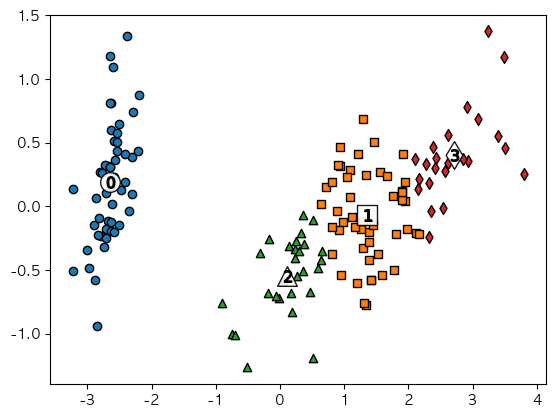

In [60]:
# 전체 과정 시각화 : 클러스터링 + 시각화 + 중심점 표시 
# n_clusters=4인 경우 

import numpy as np

# KMeans 객체를 이용해서 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=4, n_init=10, init='k-means++', max_iter=300, random_state=0)
cluster_labels = kmeans.fit_predict(cluster_df)
# clusterDF['kmeans_label'] = cluster_labels
cluster_df.loc[:, 'kmeans_label'] = cluster_labels
# 컬럼 : pca_x	pca_y	kmeans_label

# cluster_centers_ 속성 : 개별 군집의 중심 위치 좌표
# 개별 클러스터 중심의 위치 좌표 시각화를 위해추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^','d']


# 군집된 label 유형별로 반복하면서 marker별로 scatter plot 수행
for label in unique_labels:
    # 군집별 마커로 산점도 표현
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]    
    plt.scatter(x=label_cluster['pca_x'], y=label_cluster['pca_y'], 
                edgecolor='k', marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    # 중심 좌표에 마커별 표시
    center_x_y = centers[label]
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, 
                edgecolor='k', marker=markers[label])
    
    # 마커 내에 레이블 값 표시
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', 
                edgecolor='k', marker='$%d$' % label) # k : black, w : white
    
plt.show()

# $ : matplotlib 수학적 표기 의미
# %d : 숫자값 출력 의미
# % label : 출력되는 레이블 값 (레이블 값을 %d 위치에 출력)

#### 붓꽃 데이터 세트 군집화 결과 : 예외적  
- 결과값에 품종을 의미하는 타깃 레이블이 있어서
- 이 레이블과 비교해서 군집화가 얼마나 효율적으로 이루어졌는지 짐작 가능 

### 군집화 결과 
- n_clusters 수에 따라 군집화를 다르게 수행해봤는데  
- 어느 방법이 군집화 잘 되어 있는지 알 수 없음   
---> 군집화 평가 필요  
--> 대표적인 군집화 평가 방법 : 실루엣 분석 수행 필요   

###  엘보우 거브를 이용한 최적의 군집 개수 K 결정
- 이너셔(Inertial) : 군집 내 거리의 제곱합(SSE:sum of squared errors)
  - 각 샘플과 가장 가까운 센트로이드(중심점) 사이의 평균 거리 제곱합 
  - 합이 적을수록 군집 내에 거리가 가깝게 모여 있다는 의미 
- 클러스터 수가 증가하면서 이너셔(Inertia)가 감소하게 되는데
- 급격하게 감소하다가 완만하게 감소하게 되는 지점을 엘보우(Elbow) 포인트라고 함
- 엘보우(Elbow) 포인트: 적정 클러스터 개수 K로 지정 


In [61]:
# !pip install kmodes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint16)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=uint16)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2], dtype=uint16)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2], dtype=uint16)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 4, 4, 2, 2, 2, 2, 1, 2, 2, 2,
       4, 4, 2, 1, 4, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2,
       4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2], dtype=uint16)

Text(0.5, 0, 'number of clusters')

Text(0, 0.5, 'inertia')

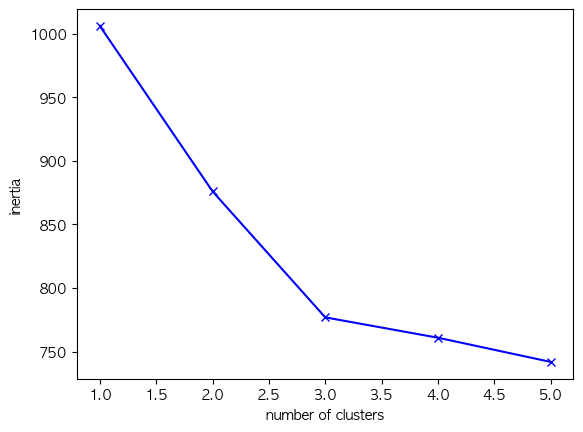

In [64]:
from kmodes.kmodes import KModes

# 엘보우 커브
cost = []
K = range(1, 6)

for i in K:
    kmode = KModes(n_clusters = i, n_init=3)
    kmode.fit_predict(iris_df)
    cost.append(kmode.cost_)

    
plt.plot(K, cost, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()
